The following are simple cells to execute gradient descent. The first example uses a one-parameter model to introduce the algorithm, while the second directly implements linear regression by optimizing the coefficients of the model. Finally, the concept of autograd is introduced through the PyTorch library.

### Random Dataset

In [22]:
# simple data generation procedure:

In [23]:
import numpy as np

In [24]:
import matplotlib.pyplot as plt

Input Values :  [-0.5  -0.49]  Output Values :  [-0.53476584 -0.54486111]


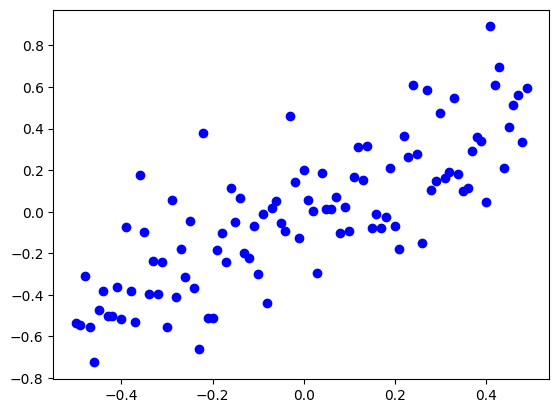

In [25]:
# an array ranging from -0.5 to 0.5 (step of 0.01)
inputX = np.arange(-0.5, 0.5, 0.01)

# random values (normal distribution to add noise).
noise = np.random.normal(0, 0.2, inputX.shape)

# output values + noise.
outputY = inputX+noise

print("Input Values : ", inputX[:2], " Output Values : ", outputY[:2])

# scatter -> inputX, outputY
plt.scatter(inputX, outputY, c="blue", label="Dataset")

### Gradient Descent (partial derivative vector)

In [26]:
# gradient descent with callback function for printing and storing values (for example)

def gradient_descent(

    gradient, x, y,
    start,learn_rate=0.1, 
    n_iter=50, tolerance=1e-06,

    callback = lambda x : print(x)
):

    vector = start

    for _ in range(n_iter):

        diff = -learn_rate * np.array(gradient(x, y, vector))

        if np.all(np.abs(diff) <= tolerance):

            break

        vector += diff

        callback(np.copy(vector))

    return vector

### Gradient Descent (one paramter model)


 
 The gradient is just a vector of (partial) derivatives of the loss function w.r.t the model parameters. Sounds complicated but it's not at all.

In [27]:
# the most simple model : wx_i (computing analytic derivative)

$$
f(w)=\frac{1}{n}\sum^{n}_{i=1}((wx_i)-y_i))^2
$$

$$
\frac{d}{dw}f(w)=\frac{1}{n}\sum^{n}_{i=1}2x_i(wx_i - y_i)
$$

Considerations for the algorithm:


    - Which direction to move our parameter in to decrease loss (increase or decrease the value)

    - How far to move it (deciding the amount to adjust it. For example by 0.1 or 2 or 50 )

    - gradient actually points in the direction of steepest ascent. This is why gradient descent uses its negative value (to move in the direction of steepest descent)


$$

w_{new} = w - \alpha \times gradient

$$

$$

w_{new} = w - \alpha \frac{d}{dw}f(w)

$$

In [28]:
# in code:

x = inputX
y = outputY

def gradient(x, y, w):
    
    return 2 * (x * (w * x - y)).mean()

gradient(x, y, w=0.5)

-0.07436152244822646

### Gradient Descent (two paramter model)

$$f(w)=\frac{1}{n}\sum^{n}_{i=1}((w_0 + w_1x)-y_i))^2$$

$$\frac{\partial{}}{\partial{}w_0}f(w)=\frac{1}{n}\sum^{n}_{i=1}2((w_0 + w_1x) - y_i)$$

$$\frac{\partial{}}{\partial{}w_1}f(w)=\frac{1}{n}\sum^{n}_{i=1}2x_i((w_0 + w_1x) - y_i)$$

In [29]:
weight = 0.1

bias = 1.0

def linear_regression_equation(input_value, weight, bias):

    predicted_value = (weight * input_value) + bias
    
    return predicted_value


In [30]:
def gradient(x, y, w):
    
    grad_w0 = (1/len(x)) * 2 * sum(w[0] + w[1] * x - y)
    grad_w1 = (1/len(x)) * 2 * sum(x * (w[0] + w[1] * x - y))
    
    return np.array([grad_w0, grad_w1])

gradient(x, y, w=[10, 0.5])

array([20.02036373, -0.17436152])

In [31]:
def cost_function(input_value, weight, bias, target_value):

    c = 0

    for i,t in zip(input_value, target_value):

        predicted_value = linear_regression_equation(i, weight, bias)
        
        difference = (t - predicted_value)**2

        c += difference

    return c


In [32]:
# execution of algorithm: 

In [33]:
# gradient descent with callback function for printing and storing values (for example)

def gradient_descent(

    gradient, x, y,
    start,learn_rate=0.1, 
    n_iter=50, tolerance=1e-06,

    callback = lambda x : print(x)
):

    vector = start

    for _ in range(n_iter):

        diff = -learn_rate * np.array(gradient(x, y, vector))

        if np.all(np.abs(diff) <= tolerance):

            break

        vector += diff

        callback(np.copy(vector))

    return vector

In [35]:
values = [] 

# execute gradient descent
gradient_descent(
    gradient, x, y, 
    start=[1.2, 1.0], learn_rate=0.001, n_iter=10,
    callback = lambda x : values.append(x)
)

# print iteration values;
print(values)

[array([1.19758464, 1.00000301]), array([1.1951741, 1.000006 ]), array([1.19276839, 1.00000896]), array([1.19036749, 1.0000119 ]), array([1.18797139, 1.00001481]), array([1.18558009, 1.0000177 ]), array([1.18319356, 1.00002056]), array([1.18081181, 1.0000234 ]), array([1.17843482, 1.00002622]), array([1.17606259, 1.00002901])]


### Automatic Differentiation

In [ ]:
import torch
import random

In [21]:
x = torch.tensor(5.) # some data
w = torch.tensor(4.,requires_grad=True) # weight ( slope )
b = torch.tensor(2.,requires_grad=True) # bias (intercept)

y = x*w + b # equation of linear regression
y.backward() # variable to be differentiated

print(w.grad,b.grad) # derivative of Y with respect to w and b

tensor(5.) tensor(1.)


In [44]:
def gradient_value_using_autograd_cal_wrapper(inputX, outputY, values):

    w = torch.tensor(values[0], requires_grad=True) # wrapping weigh
    b = torch.tensor(values[1], requires_grad=True) # and bias
    n = len(inputX)

    for x,y in zip(inputX, outputY):

        predicted_value = (w * x) + b

        loss = (y - predicted_value)**2
        
        loss.backward()

    return ((w.grad/n), (b.grad/n))

In [45]:
values = [] 

# execute gradient descent
gradient_descent(
    # pytorch's automatic differentiation;
    gradient_value_using_autograd_cal_wrapper, x, y, 
    start=[1.2, 1.0], learn_rate=0.001, n_iter=10,
    callback = lambda x : values.append(x)
)

# print iteration values
print(values)

[array([1.19996767, 0.99798664]), array([1.19993533, 0.9959773 ]), array([1.19990297, 0.99397198]), array([1.1998706 , 0.99197067]), array([1.19983821, 0.98997336]), array([1.19980581, 0.98798005]), array([1.19977339, 0.98599073]), array([1.19974096, 0.98400538]), array([1.19970852, 0.982024  ]), array([1.19967606, 0.98004659])]
